In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [2]:
df=pd.read_csv("FastagFraudDetection.csv")
df.head(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
df.shape

(5000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [6]:
df.drop(['Transaction_ID'],axis=1,inplace=True)

In [7]:
df

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [8]:
df.drop(['TollBoothID','FastagID','Timestamp','Vehicle_Plate_Number'],axis=1,inplace=True)

In [9]:
df.head(5)

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,Bus,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,Car,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,Motorcycle,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,Truck,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,Van,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud


In [10]:
df['Geographical_Location'].value_counts()

Geographical_Location
13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: count, dtype: int64

array([[<Axes: title={'center': 'Transaction_Amount'}>,
        <Axes: title={'center': 'Amount_paid'}>],
       [<Axes: title={'center': 'Vehicle_Speed'}>, <Axes: >]],
      dtype=object)

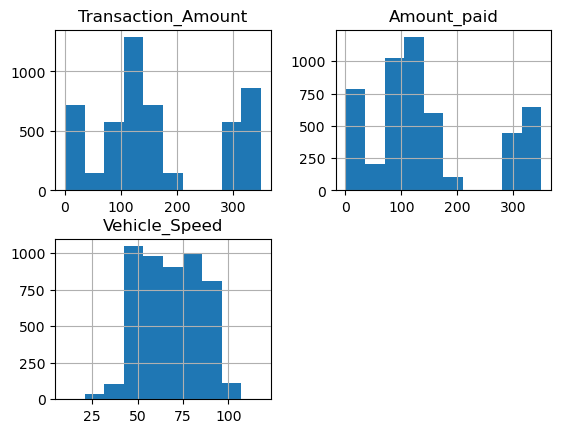

In [11]:
df.hist()

<Axes: ylabel='proportion'>

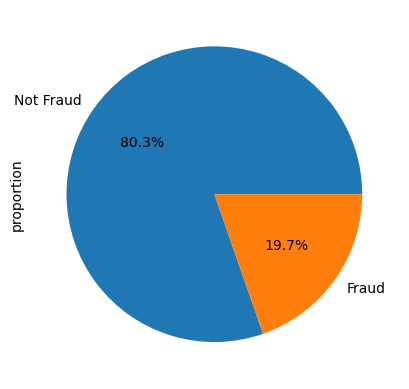

In [12]:
(df['Fraud_indicator'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='proportion'>

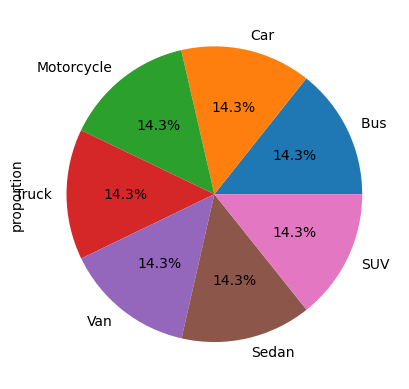

In [13]:
(df['Vehicle_Type'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%1.1f%%')


<Axes: ylabel='proportion'>

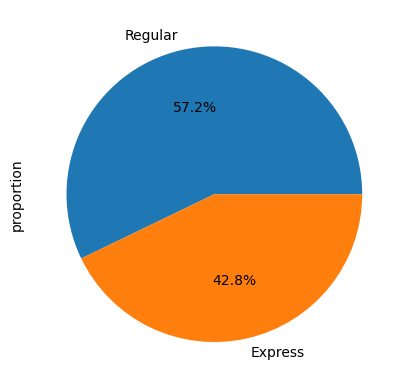

In [14]:
(df['Lane_Type'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='proportion'>

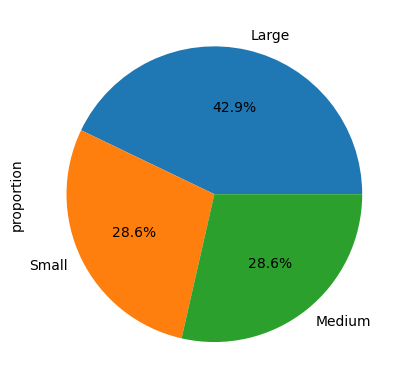

In [15]:
(df['Vehicle_Dimensions'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%1.1f%%')

Text(0, 0.5, '')

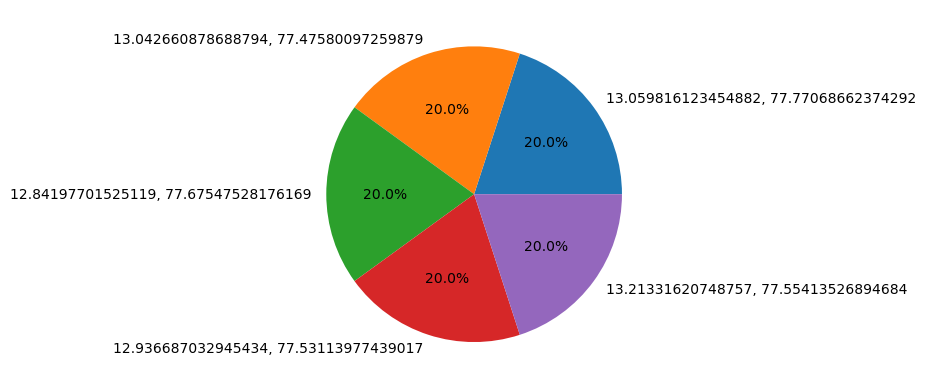

In [16]:
(df['Geographical_Location'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')

<Axes: xlabel='Vehicle_Type,Fraud_indicator'>

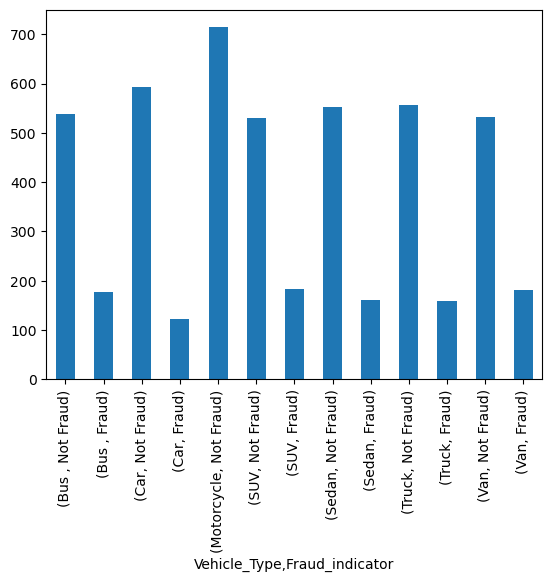

In [17]:
(df['Fraud_indicator'].groupby(df['Vehicle_Type']).value_counts()).plot(kind='bar')

<Axes: xlabel='Geographical_Location,Fraud_indicator'>

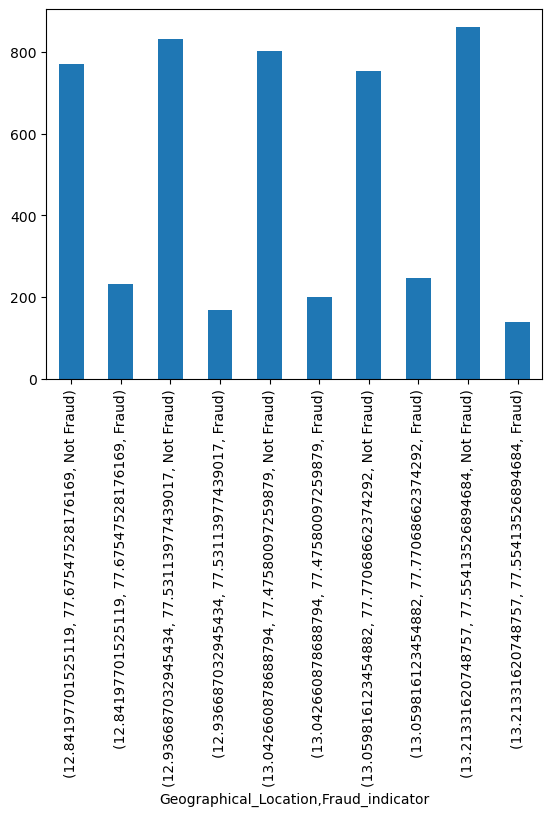

In [18]:
(df['Fraud_indicator'].groupby(df['Geographical_Location']).value_counts()).plot(kind='bar')

<Axes: xlabel='Lane_Type,Fraud_indicator'>

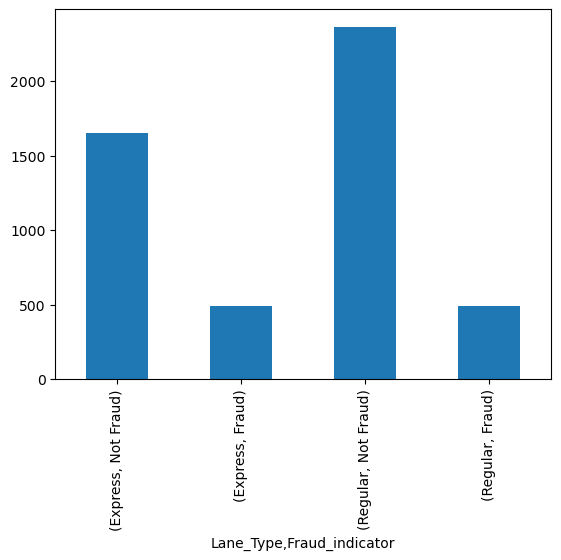

In [19]:
(df['Fraud_indicator'].groupby(df['Lane_Type']).value_counts()).plot(kind='bar')

<Axes: xlabel='Vehicle_Dimensions,Fraud_indicator'>

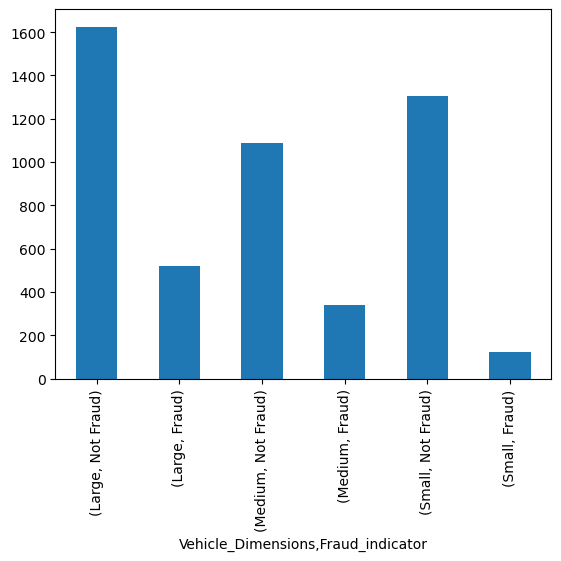

In [20]:
(df['Fraud_indicator'].groupby(df['Vehicle_Dimensions']).value_counts()).plot(kind='bar')

In [21]:
#Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Vehicle_Type']=label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type']=label_encoder.fit_transform(df['Lane_Type'])
df['Vehicle_Dimensions']=label_encoder.fit_transform(df['Vehicle_Dimensions'])
df['Geographical_Location']=label_encoder.fit_transform(df['Geographical_Location'])
df['Fraud_indicator']=label_encoder.fit_transform(df['Fraud_indicator'])





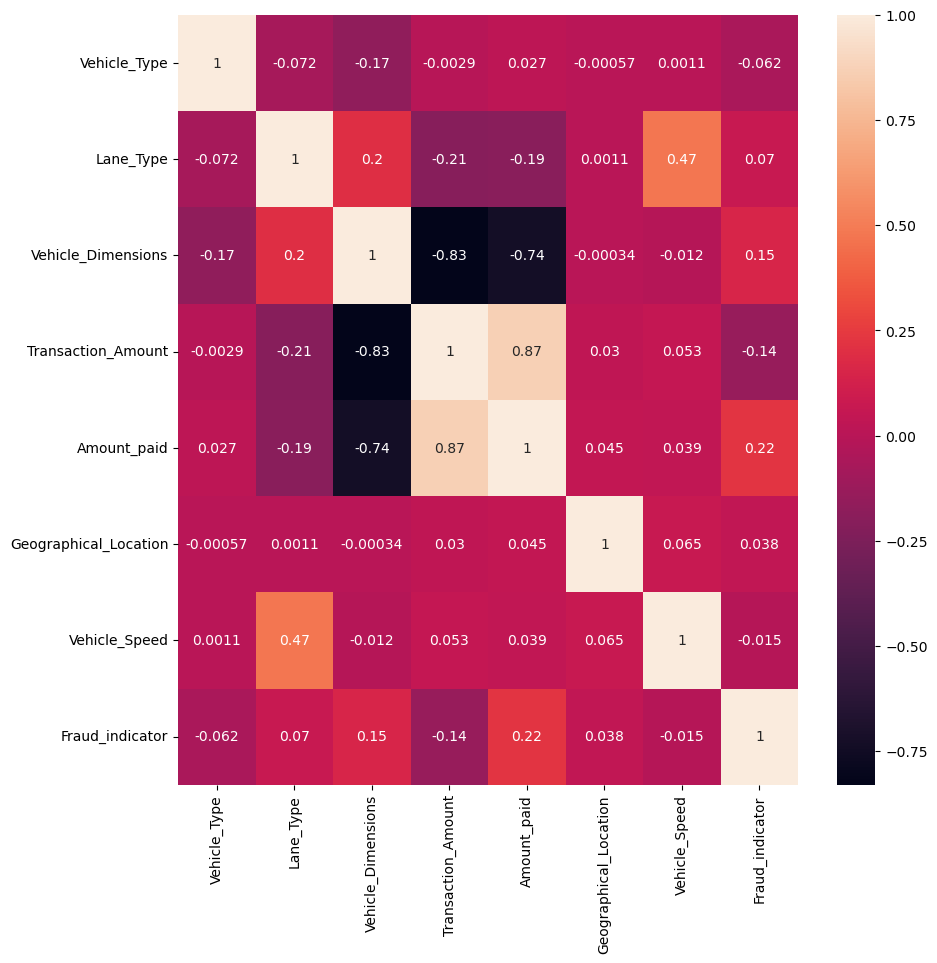

In [22]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.savefig('corrMatrix.png')

In [23]:
df.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
0,0,0,0,350,120,3,65,0
1,1,1,2,120,100,3,78,0
2,2,1,2,0,0,3,53,1
3,5,1,0,350,120,3,92,0
4,6,0,1,140,100,3,60,0


In [24]:
X=df.drop(['Fraud_indicator'],axis=1)
Y=df['Fraud_indicator']

In [25]:
#Spliiting
#Splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,train_size=0.75)

In [26]:
y_train.value_counts()

Fraud_indicator
1    3035
0     715
Name: count, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [28]:
y_resampled.value_counts()

Fraud_indicator
1    3035
0    3035
Name: count, dtype: int64

In [36]:
#Before oversampling
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RFmodel = RandomForestClassifier()
RFmodel.fit(x_train,y_train)
RFpred=RFmodel.predict(x_test)
report = classification_report(y_test, RFpred, target_names=['Fraud', 'Not Fraud'])
print(report)


              precision    recall  f1-score   support

       Fraud       1.00      0.97      0.99       268
   Not Fraud       0.99      1.00      1.00       982

    accuracy                           0.99      1250
   macro avg       1.00      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [37]:
importances = RFmodel.feature_importances_
feature_names = X.columns

# Display importances
for feature, importance in zip(feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Vehicle_Type, Importance: 0.050823683142597956
Feature: Lane_Type, Importance: 0.005661139756176178
Feature: Vehicle_Dimensions, Importance: 0.0742399878732196
Feature: Transaction_Amount, Importance: 0.2097582941802956
Feature: Amount_paid, Importance: 0.5956194602153492
Feature: Geographical_Location, Importance: 0.026306146555682895
Feature: Vehicle_Speed, Importance: 0.037591288276678694


In [38]:
RFmodel2 = RandomForestClassifier()
RFmodel2.fit(x_resampled,y_resampled)
RFpred2=RFmodel2.predict(x_test)
report = classification_report(y_test, RFpred2,target_names=['Fraud', 'Not Fraud'])
print(report)


              precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99       268
   Not Fraud       0.99      1.00      1.00       982

    accuracy                           1.00      1250
   macro avg       1.00      0.99      0.99      1250
weighted avg       1.00      1.00      1.00      1250



In [39]:
#XGBoost
from xgboost import XGBClassifier
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(x_train, y_train)
XGBpred=XGBmodel.predict(x_test)
report = classification_report(y_test, XGBpred,target_names=['Fraud', 'Not Fraud'])
print(report)

              precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99       268
   Not Fraud       0.99      1.00      1.00       982

    accuracy                           1.00      1250
   macro avg       1.00      0.99      0.99      1250
weighted avg       1.00      1.00      1.00      1250



In [40]:
XGBmodel2 = XGBClassifier(random_state=42)
XGBmodel2.fit(x_resampled, y_resampled)
XGBpred2=XGBmodel2.predict(x_test)
report = classification_report(y_test, XGBpred2,target_names=['Fraud', 'Not Fraud'])
print(report)

              precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99       268
   Not Fraud       0.99      1.00      1.00       982

    accuracy                           1.00      1250
   macro avg       1.00      0.99      0.99      1250
weighted avg       1.00      1.00      1.00      1250



In [34]:
importances = XGBmodel.feature_importances_
feature_names = X.columns

# Display importances
for feature, importance in zip(feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Vehicle_Type, Importance: 0.020204195752739906
Feature: Lane_Type, Importance: 0.006874152459204197
Feature: Vehicle_Dimensions, Importance: 0.007452304940670729
Feature: Transaction_Amount, Importance: 0.7257000803947449
Feature: Amount_paid, Importance: 0.21817606687545776
Feature: Geographical_Location, Importance: 0.015312434174120426
Feature: Vehicle_Speed, Importance: 0.006280835717916489
